In [1]:
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("price_demand_data.csv")
df2 = pd.read_csv("weather_data.csv")

In [3]:
# Get the dd/mm/yyyy field from SETTLEMENTDATE so we can join it with the weather
# Separate the Day and Month from Date
df1['Date'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021


In [4]:
# merge two datasets together (df1 as price_demand and df2 as weather)
df_mergeddata = df1.merge(df2, left_on='Date', right_on='Date')
df_mergeddata["Date"] = pd.to_datetime(df_mergeddata.Date, format="%d/%m/%Y")
df_mergeddata

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [5]:
# replaece price's category with int index 
df_mergeddata = df_mergeddata.replace({'LOW':1,'MEDIUM':2,'HIGH':3,'EXTREME':4},regex = True)

In [6]:
# Aggregate daily energy usage from every half an hour data to a daily mean value
df_mergeddata = df_mergeddata.groupby('Date').mean().reset_index()
df_mergeddata = df_mergeddata.astype({"PRICECATEGORY": int})
df_mergeddata = df_mergeddata.fillna(df_mergeddata.mean()) 
df_mergeddata

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.


,Date,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
0,2021-01-01,3954.327021,1,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6.0,1018.800000,28.1,43.0,5.0,1015.3
1,2021-01-02,4124.794375,1,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7.0,1013.300000,28.7,38.0,7.0,1008.5
2,2021-01-03,3932.145000,1,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8.0,1007.700000,23.5,59.0,4.0,1005.2
3,2021-01-04,4151.688958,1,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8.0,1010.000000,18.2,82.0,8.0,1011.0
4,2021-01-05,4326.685625,1,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8.0,1012.500000,18.2,82.0,8.0,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021-08-27,5593.547083,1,4.6,13.6,0.0,1.2,3.8,15.0,7.7,88.0,7.0,1020.000000,12.8,65.0,7.0,1017.4
239,2021-08-28,4356.352708,1,5.3,17.8,0.0,1.6,9.6,39.0,9.1,80.0,1.0,1018.600000,17.4,31.0,3.0,1013.5
240,2021-08-29,4676.028125,1,9.1,16.2,0.6,6.4,4.3,33.0,10.6,79.0,7.0,1011.400000,12.8,84.0,7.0,1010.4
241,2021-08-30,4836.633333,1,6.4,17.6,4.0,1.4,7.4,50.0,11.1,70.0,7.0,1016.100000,16.8,45.0,1.0,1013.2


In [17]:
df_mergeddata.isnull().any()

Date                                 False
TOTALDEMAND                          False
Minimum temperature (°C)             False
Maximum temperature (°C)             False
Rainfall (mm)                        False
Evaporation (mm)                     False
Sunshine (hours)                     False
Speed of maximum wind gust (km/h)    False
9am Temperature (°C)                 False
9am relative humidity (%)            False
9am cloud amount (oktas)             False
9am MSL pressure (hPa)               False
3pm Temperature (°C)                 False
3pm relative humidity (%)            False
3pm cloud amount (oktas)             False
3pm MSL pressure (hPa)               False
PRICECATEGORY                        False
dtype: bool

In [ ]:
#df_mergeddata_clean = df_mergeddata.drop(['SETTLEMENTDATE','Direction of maximum wind gust ',
                                          'Time of maximum wind gust','9am wind direction', '3pm wind direction','9am wind speed (km/h)',
                                          '3pm wind speed (km/h)'], axis=1)

In [ ]:
#df_mergeddata_clean.describe()

## Build linear regression model - model1

In [21]:
# Prediction (TOTALDEMAND)
#y = pd.DataFrame(data.target, columns=["MEDV"])
y = df_mergeddata[["TOTALDEMAND"]]
y.head()

,TOTALDEMAND
0,3954.327021
1,4124.794375
2,3932.145000
3,4151.688958
4,4326.685625


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Create the design matrix using the two variables
X = df_mergeddata[['Maximum temperature (°C)', 'Speed of maximum wind gust (km/h)']]
#y = df_mergeddata[['TOTALDEMAND']]

In [24]:
# split it so that we have 80% data for training (finding the coefficients of our model)
# and 20% for evaluating the model using MSE
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [25]:
# train the model
lm = LinearRegression().fit(X_train, y_train)

In [26]:
# predict values of y given our hidden test set
y_pred = lm.predict(X_test)

In [27]:
y_test[:5], y_pred[:5]

(array([[6119.42895833],
        [4194.70625   ],
        [5209.57895833],
        [4324.87791667],
        [5593.54708333]]), array([[4103.98883042],
        [4666.31692655],
        [4914.13510429],
        [4897.18686529],
        [5150.94374332]]))

In [28]:
MSE = mean_squared_error(y_test, y_pred)
R2 = lm.score(X_test, y_test)
MSE, R2

(363604.98872528505, -0.026921832859539307)

In [29]:
alpha = lm.intercept_
beta = lm.coef_
alpha, beta

(array([5712.67141424]), array([[-42.37059749,   0.96749699]]))

In [30]:
# get below value when merged dataset by chose mean value of the day
Maximum_temperature = X['Maximum temperature (°C)'].values
MaxWindSpeed = X['Speed of maximum wind gust (km/h)'].values

TOTALDEMAND = 5712.67 - 42.37*Maximum_temperature + 0.97*MaxWindSpeed

In [ ]:
# get below value when merged dataset by chose max value of the day
#Maximum_temperature = X['Maximum temperature (°C)'].values
#MaxWindSpeed = X['Speed of maximum wind gust (km/h)'].values

#TOTALDEMAND = 7106.83 - 55.09*Maximum_temperature + 2.94*MaxWindSpeed

In [31]:
output = pd.DataFrame(TOTALDEMAND, columns=['TOTALDEMAND_predicted'])
output['TOTALDEMAND_actual'] = y
output

,TOTALDEMAND_predicted,TOTALDEMAND_actual
0,4475.877,3954.327021
1,4513.040,4124.794375
2,4634.586,3932.145000
3,4964.358,4151.688958
4,4937.353,4326.685625
...,...,...
238,5150.988,5593.547083
239,4996.314,4356.352708
240,5058.286,4676.028125
241,5015.458,4836.633333


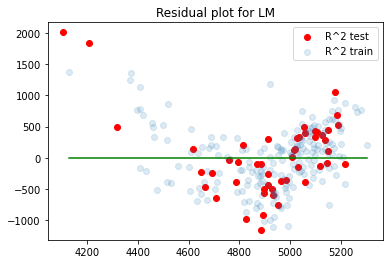

In [32]:
# make predictions
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)

# calculate residuals
residual_test = [true_val - estimated_val for true_val, estimated_val in zip(y_test, y_pred_test)]
residual_train = [true_val - estimated_val for true_val, estimated_val in zip(y_train, y_pred_train)]

# plot residuals
plt.scatter(y_pred_test, residual_test, label='R^2 test', color='red')
plt.scatter(y_pred_train, residual_train, label='R^2 train', alpha=0.15)

# plot the 0 line (we want our residuals close to 0)
plt.plot([min(y_pred_train), max(y_pred_train)], [0,0], color='green')

plt.legend()

plt.title("Residual plot for LM")
plt.show()

#### create a new split criterion, but now, on the full feature space
X_train, X_test, y_train, y_test = train_test_split(df_mergeddata.values, y.values, test_size=0.2, random_state=42)
lm_full = LinearRegression().fit(X_train, y_train)
y_pred = lm_full.predict(X_test)

##### calculate evaluation metrics
MSE = mean_squared_error(y_test, y_pred)
R2 = lm_full.score(X_test, y_test)
MSE, R2

## Build decision tree model - model2

In [7]:
df_mergeddata = df_mergeddata[['Date','TOTALDEMAND','Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',
                  '9am Temperature (°C)','9am relative humidity (%)','9am cloud amount (oktas)','9am MSL pressure (hPa)','3pm Temperature (°C)','3pm relative humidity (%)',
                  '3pm cloud amount (oktas)','3pm MSL pressure (hPa)','PRICECATEGORY']]
df_mergeddata

,Date,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa),PRICECATEGORY
0,2021-01-01,3954.327021,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6.0,1018.800000,28.1,43.0,5.0,1015.3,1
1,2021-01-02,4124.794375,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7.0,1013.300000,28.7,38.0,7.0,1008.5,1
2,2021-01-03,3932.145000,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8.0,1007.700000,23.5,59.0,4.0,1005.2,1
3,2021-01-04,4151.688958,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8.0,1010.000000,18.2,82.0,8.0,1011.0,1
4,2021-01-05,4326.685625,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8.0,1012.500000,18.2,82.0,8.0,1013.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021-08-27,5593.547083,4.6,13.6,0.0,1.2,3.8,15.0,7.7,88.0,7.0,1020.000000,12.8,65.0,7.0,1017.4,1
239,2021-08-28,4356.352708,5.3,17.8,0.0,1.6,9.6,39.0,9.1,80.0,1.0,1018.600000,17.4,31.0,3.0,1013.5,1
240,2021-08-29,4676.028125,9.1,16.2,0.6,6.4,4.3,33.0,10.6,79.0,7.0,1011.400000,12.8,84.0,7.0,1010.4,1
241,2021-08-30,4836.633333,6.4,17.6,4.0,1.4,7.4,50.0,11.1,70.0,7.0,1016.100000,16.8,45.0,1.0,1013.2,1


In [8]:
# Build decision tree model
X = df_mergeddata[df_mergeddata.columns[1:-1]]
X.head()

,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
0,3954.327021,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6.0,1018.8,28.1,43.0,5.0,1015.3
1,4124.794375,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7.0,1013.3,28.7,38.0,7.0,1008.5
2,3932.145000,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8.0,1007.7,23.5,59.0,4.0,1005.2
3,4151.688958,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8.0,1010.0,18.2,82.0,8.0,1011.0
4,4326.685625,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8.0,1012.5,18.2,82.0,8.0,1013.3


In [9]:
# Class label
y = df_mergeddata['PRICECATEGORY']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PRICECATEGORY, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, # features
                                                    y, # class label
                                                    train_size=0.8, # proportion to use for train
                                                    test_size=0.2, # proportion to use for test
                                                    random_state=33 # the random state is fixed to 33
                                                   )

In [11]:
X_train.head()

,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
126,5016.126667,10.5,21.5,0.2,2.4,3.6,15.0,13.9,91.0,4.0,1014.8,20.2,37.0,6.0,1011.3
192,5559.835417,5.9,16.1,0.0,3.0,5.1,50.0,11.4,71.0,7.0,1018.1,15.8,44.0,1.0,1013.6
82,4788.793125,17.0,20.3,0.6,2.2,1.7,33.0,17.5,100.0,7.0,999.9,19.3,85.0,7.0,999.7
87,4631.351667,13.8,18.2,1.0,2.8,8.0,35.0,15.4,73.0,7.0,1024.0,17.4,55.0,7.0,1024.7
85,4148.296875,13.2,21.3,3.4,3.8,4.1,31.0,14.9,88.0,7.0,1010.8,19.9,44.0,2.0,1010.6


In [12]:
from sklearn.tree import DecisionTreeClassifier

# initialise the tree
dt = DecisionTreeClassifier(criterion="entropy", # the criterion to split - we will use entropy
                            random_state=33, # the random state to run this at 33
                            max_depth=3 # the depth of the tree
)

# fit it to the training dataset
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=33)

In [13]:
# assign y_pred to the predictions of the DT given the X_test
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1])

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8367346938775511

## Draw gragh of decision tree

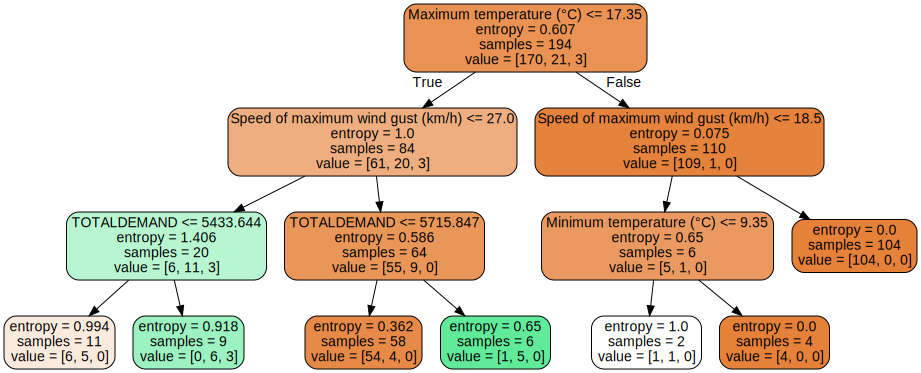

In [15]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dt, # the model we trained
                out_file="smytree.dot", # name of the output file - has to be a .dot file
                feature_names=X.columns, # the names of our features
                filled=True, # formatting: do we want to fill the features with colour
                rounded=True # formatting: do we want rounded edges
               )

# then, open the file using Python
with open("./smytree.dot") as f:
    dot_graph = f.read()

# visualize using graphviz, you won't be able to "open" it using normal methods
graphviz.Source(dot_graph)

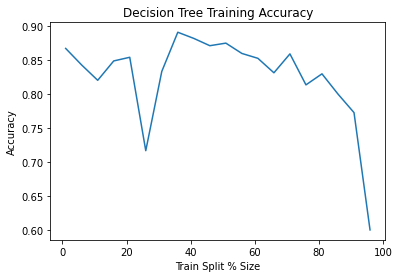

In [16]:
import matplotlib.pyplot as plt

# create split sizes from 1 to 100 in intervals of 5
split_sizes = range(1, 101, 5)

# initialise a dictionary of results
results = {}

for split in split_sizes:
    # train test split with the given split size
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split/100, 
                                      test_size=(1 - split/100), random_state=42)
    
    # fit the model
    dt.fit(X_train, y_train)
    
    # predict
    y_pred = dt.predict(X_test)
    
    # assign the accuracy to the dictionary
    results[split] = accuracy_score(y_test, y_pred)
    
# plot the split sizes vs the dictionary of results
plt.plot(split_sizes, results.values())

plt.title("Decision Tree Training Accuracy")
plt.xlabel("Train Split % Size")
plt.ylabel("Accuracy")

plt.show()